<a href="https://colab.research.google.com/github/yunhyeongil/pandas_base/blob/master/seq2seq_with_attention_%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%98%81%EC%96%B4_%EB%B2%88%EC%97%AD%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# 데이터 준비하기

- 데이터를 url로 다운받아서 압축을 풀어보려고 했지만 에러가 나서 다운받아서 올렸다.

- [압축풀기명령어](https://aigong.tistory.com/164)

In [ ]:
# !wget https://github.com/jungyeul/korean-parallel-corpora/blob/master/korean-english-news-v1/korean-english-park.train.tar.gz

In [ ]:
# !tar -xvzf korean-english-park.train.tar.gz # !sudo tar -xvfz korean-english-park.train.tar.gz

In [ ]:
import pandas as pd


english_df = pd.read_fwf('/content/drive/MyDrive/Colab Notebooks/자연어처리/dataset/korean-english-park.train.en', header=None)
korean_df = pd.read_fwf('/content/drive/MyDrive/Colab Notebooks/자연어처리/dataset/korean-english-park.train.ko', header=None)

In [ ]:
korean_df.head()

,0,1,2,3,4
0,"개인용 컴퓨터 사용의 상당 부분은 ""이것보다 뛰어날 수 있느냐?""",NaN,NaN,NaN,NaN
1,모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하...,NaN,NaN,NaN,NaN
2,그러나 이것은 또한 책상도 필요로 하지 않는다.,NaN,NaN,NaN,NaN
3,"79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분...",NaN,NaN,NaN,NaN
4,정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔...,NaN,NaN,NaN,NaN


In [ ]:
korean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94123 entries, 0 to 94122
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       94123 non-null  object
 1   1       738 non-null    object
 2   2       607 non-null    object
 3   3       498 non-null    object
 4   4       363 non-null    object
dtypes: object(5)
memory usage: 3.6+ MB


In [ ]:
korean_df[1].unique()

array([nan, '있다고', '있다.', '제출해', '"구걸', '그 발', '졌다.', '추게', '의 연', '게 만',
       'is', 'ect', 'ntr', '는 것', '.', '대해서', '능력을', '요를', '왜냐하', '"고',
       '니(沈', '기되거', '만 했', '자들은', '미국', '에 출', 'ouc', '하며', '장면', '. 예',
       'ion', 'e 처', '다.', '를 또', 'ely', 'h c', '번역', '을 훼', '’이라', '속 공',
       '명을', '하다\xa0', '향상', '가 없', '대\xa0', '라고', '의 니', 'pow', '미트라',
       '(=', 'e w', '내다\xa0', '들을', '생각한', '(=f', '지도', '있다', '다는', '타내고',
       '고 있', '대서', '동안이', '주었', '하고', '했다.', '소송을', '기 때', '는 의', '보도했',
       '지 2', '하는', '입장을', '드 에', '고 말', '부정(', '캐스팅', '선출되', '멋진', '다”고',
       '보츠와', 'oma', '1월까', '않을', '의 인', '철수', '도했다', '루스', 'ia', '식량',
       '있게', '했다”', '자들에', '에서', 'tra', '난 건', '변했다', '밀수', '지 동', '혔다.',
       '출신', '기했다', '집지역', '사람들', '주장', '미(', '때 찬', '사를', '다고', '구했다',
       '말했', '수상', '비교해', '곡물', '생각했', '기도', '통해', '이들', '는 풍', 'NN과',
       '하게', '밝혔', '했던', '로 설', '요로', '장 큰', 'anc', '예정이', ')에', '’,',
       '한다”', '수입을', '버전인', 'ost', 'OIN', '탄압', '

In [ ]:
korean_df[2].unique()

array([nan, '그들은', '한다', '부문', '\xa0 /', '는 능', '결과', '고,', 'eal', '서 i',
       'es를', '우리', '도 말', '국민들', '고 받', ', 사', '했다.', ')가', ', 취', '.',
       '자신들', '언론', '하도록', ')', '전 시', '이 연', '된 (', '으로\xa0', '다시',
       'nfi', '하고', '말했', '현,', '되고', '뎌냈다', '/ s', '키려고', '다고', 'ai',
       '타에', 'r 동', '전하', 'n t', 'th', '/ r', '표로', '’’고', 'und', '들이',
       '을 재', '있다.', '사람', '필되었', '지속', '습니다', '제기했', '에 사', '가 있', '여가지',
       '호단체', '밝혔다', '세리(', '다.', '正)에', '록 지', '생각이', '고 설', '설명했',
       ', 니', 'Fo', '대선', '계획이', '뷰에서', '”이라', '는 것', '트,', 'CNN', '수요를',
       '것”', '전했', '지지', '적했다', '인에게', 'ed', '사실”', '속 등', '보호', '변호사',
       '서 어', '마음', '다”고', 'now', '했지만', '혔다.', '장하지', '45배', '종류', '었다.',
       '예약을', '비난', '을 없', '명했다', '인터뷰', '장했다', '야 요', '하게', '고 있', '위험"',
       '(C', '고 발', '물할', 'BC', '올린', '‘나는', '를 포', '악몽', '고 보', '러야',
       '살아있', '충돌해', '로운', '”고', '말했다', '공유하', '것이', '네비어', '받아', '놔뒀다',
       '게재', '이 밝', '하고자', '려졌다', 'nce', 'st)', '를 친', '해

In [ ]:
korean_df[3].unique()

array([nan, '생각하고', '밝혔다', '개설했', 'manu', '말입니', '나타내', '들이 실', 'h에서',
       '는 th', '수식하고', '알았다', '다.', '게 전수', '으며,', ', 상당', '이게 된', '되었다.',
       '성공을', '체들이다', '하는 등', '를 벌였', '됐다.', 'sche', '/ te', '푸는 이',
       'ence', '감했다.', '.', '복 (=', '’', 'ecif', '매우 열', '론을 내', 'le 길',
       '항할 예', '량\xa0 /', '있다.', 'e pr', 'b (와', 'goro', '것이다', '밝혔다.',
       'r or', '채로 조', '강조한', '"고 이', '라면 가', '예정이', '" 라고', '주의력', '것 같',
       '도메인', '배분할', 'rand', '대해서는', '해야 한', '”라고', '했다.', '르, 케', 'ndat',
       '보 레이', '고 밝혔', '전했다.', '설명했', '이라고', '리 투르', '/권성근', '맞추기',
       '라고 말', '호소했', '돌아가지', 'riba', '라고 주', '권고했', '로 보내', '등이 인',
       '운 상황', '얻을', '보도했다', 'ng M', '그에 대', '않는다', '많은 양', '로 저장',
       '하면 개', '달라고', '통해', '단 공주', '는지 를', '”고 말', 'N)/권', '있는', '미 키미',
       '때 제이', '거기 없', '한 전', '끝나도', '다"고', '쥐를', '사망했다', '예의 전', '록 권유',
       '왕비로', '여진다.', '진술했', '졌다고', '마련됐다', '신의 고', 'Air', '로 인기', '뿐이라',
       '카트를', '경험을', '‘정지’', '혔다.', '4%씩', '뷰에서', '게임‘광', '곡이다.

In [ ]:
korean_df[4].unique()

array([nan, '있다.', '.', 'act', '."', '주고', '상태', 'is는', 'ri', '러 방', '타당',
       '"고', '계속', '여론을', 'ule', 'sio', '를 잘', 'epe', 'c 특', '히 했', '다.',
       '란 통', '이었다', 'spa', 'ces', '의견이', 's 혹', 'fir', '히 지', '’’고',
       '보고서', '들이', ', (', '농부인', '상당', '록을', '것이라', 'Epi', '옹호하', '”고',
       '했다.', 'on)', '를 완', '적했다', ', 존', 'JOI', '한 인', '않은', 'Ar', '만 하',
       '뷰에', '처할', '는 없', ', K', '책임', '이라고', '수', '썰매와', '원에', '여줬다',
       '유엔', '조사할', '근(J', '전제품', '진행', '린', '’(A', '계 일', '지원', '장했다',
       '다로', '입성', '연했었', '를 눕', 'las', '끌었', '설명했', '탄 것', '도하는', '튼을',
       '올랐다', '혔다.', '이 더', '도둑', '"이라', '를 구', '형사상', '기회가', '않는', '고 밝',
       '진영', '성을', '북핵', '는 약', '것으', '마련해', 'rob', '대해', '조치를', 'C)을',
       '디자인', '장소에', '화하려', '사 드', '은 아', '이 특', '텐데', '다”고', '부딪', '견되어',
       '등 부', '직이지', '이끈', '장 추', '원문', '머니', '캐너,', '실 이', '이다.', '령은',
       '의 병', '나눴', '땅이다', '드 역', '은 없', '됐다.', '된다', '는 고', '단한', '을 얻',
       '원)', '지 폐', '사건(', 'umd', 'AR)', '백과사', 

In [ ]:
korean_df.isna().sum()

0        0
1    93385
2    93516
3    93625
4    93760
dtype: int64

In [ ]:
english_df.head()

,0,1,2,3
0,"Much of personal computing is about ""can you t...",NaN,NaN,NaN
1,so a mention a few weeks ago about a rechargea...,NaN,NaN,NaN
2,"Like all optical mice, But it also doesn't nee...",NaN,NaN,NaN
3,uses gyroscopic sensors to control the cursor ...,NaN,NaN,NaN
4,Intelligence officials have revealed a spate o...,NaN,NaN,NaN


In [ ]:
english_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94123 entries, 0 to 94122
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       94123 non-null  object
 1   1       3989 non-null   object
 2   2       3317 non-null   object
 3   3       2951 non-null   object
dtypes: object(4)
memory usage: 2.9+ MB


In [ ]:
english_df[1].unique()

array([nan, '1970s', 'pe.', ..., 'meet', 'hroug', 'ial e'], dtype=object)

In [ ]:
english_df.isna().sum()

0        0
1    90134
2    90806
3    91172
dtype: int64

In [ ]:
english_ndf = english_df[0]
english_ndf.head()

0    Much of personal computing is about "can you t...
1    so a mention a few weeks ago about a rechargea...
2    Like all optical mice, But it also doesn't nee...
3    uses gyroscopic sensors to control the cursor ...
4    Intelligence officials have revealed a spate o...
Name: 0, dtype: object

In [ ]:
korean_ndf = korean_df[0]

In [ ]:
fidf = pd.concat([korean_ndf, english_ndf], axis=1,ignore_index=True)
fidf.head()

,0,1
0,"개인용 컴퓨터 사용의 상당 부분은 ""이것보다 뛰어날 수 있느냐?""","Much of personal computing is about ""can you t..."
1,모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하...,so a mention a few weeks ago about a rechargea...
2,그러나 이것은 또한 책상도 필요로 하지 않는다.,"Like all optical mice, But it also doesn't nee..."
3,"79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분...",uses gyroscopic sensors to control the cursor ...
4,정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔...,Intelligence officials have revealed a spate o...


In [ ]:
fidf[0][2]

'그러나 이것은 또한 책상도 필요로 하지 않는다.'

In [ ]:
fidf[1][2]

"Like all optical mice, But it also doesn't need a desk."

In [ ]:
fidf.isna().sum()

0    0
1    0
dtype: int64

In [ ]:
# # NaN값 제거
# fidf.dropna(inplace=True)

In [ ]:
fidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94123 entries, 0 to 94122
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       94123 non-null  object
 1   1       94123 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [ ]:
# 중복 제거
# set으로 중복 제거 하면 순서가 바뀌어서 drop_diplicates()로 중복제거함.

fidf.drop_duplicates(inplace=True)
fidf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78940 entries, 0 to 94122
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       78940 non-null  object
 1   1       78940 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [ ]:
eng_li = fidf[1].tolist()

print(len(eng_li))
print()
eng_li[:5]

78940



['Much of personal computing is about "can you top this?"',
 'so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable, wireless mouse.',
 "Like all optical mice, But it also doesn't need a desk.",
 'uses gyroscopic sensors to control the cursor movement as you move your wrist, arm, whatever through the air.',
 "Intelligence officials have revealed a spate of foiled plots on ships in Southeast Asia and are warning that a narrow stretch of water carrying almost one third of the world's maritime trade is vulnerable to a terror attack."]

In [ ]:
kor_li = fidf[0].tolist()

print(len(kor_li))
print()
kor_li[:5]

78940



['개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"',
 '모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.',
 '그러나 이것은 또한 책상도 필요로 하지 않는다.',
 '79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다.',
 '정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.']

문장의 최단 길이: 1
문장의 최장 길이: 243
문장의 평균 길이: 132


Text(0.5, 1.0, 'Sentence Length Distribution')

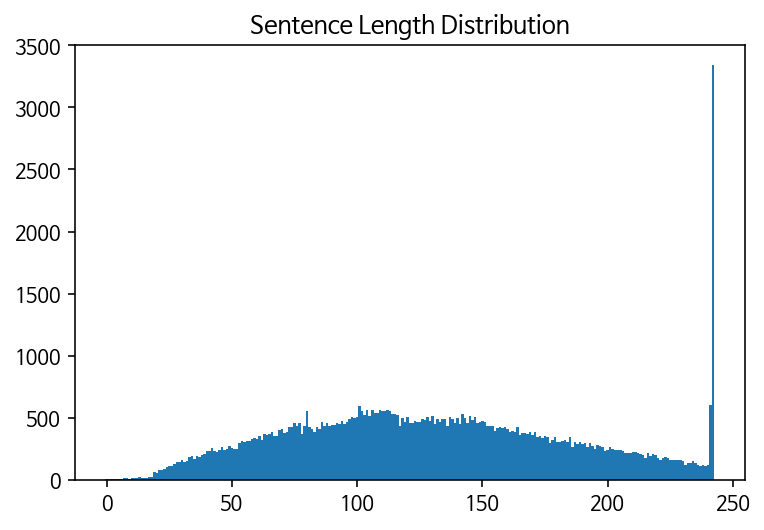

In [ ]:
import numpy as np

min_len = 999
max_len = 0
sum_len = 0

for sen in eng_li:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len//len(eng_li))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in eng_li:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")

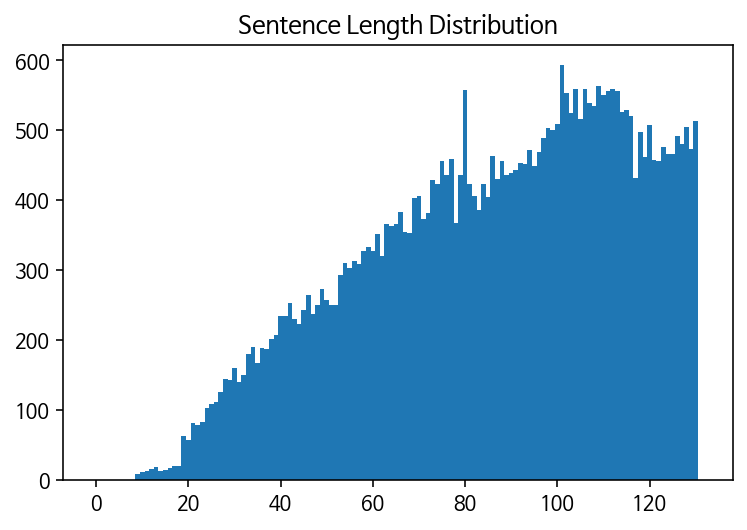

In [ ]:
max_len = 132
min_len = 10

eng_li = [s for s in eng_li if (len(s) < max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in eng_li:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

문장의 최단 길이: 1
문장의 최장 길이: 145
문장의 평균 길이: 63


Text(0.5, 1.0, 'Sentence Length Distribution')

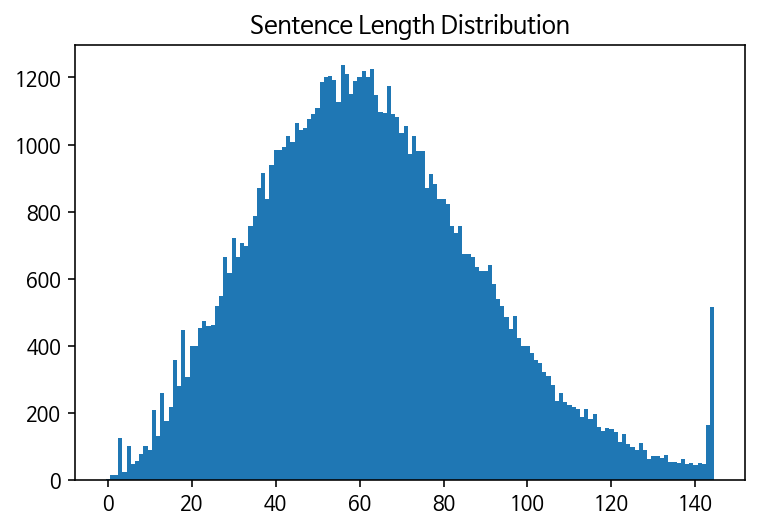

In [ ]:
min_len = 999
max_len = 0
sum_len = 0

for sen in kor_li:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len//len(kor_li))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in kor_li:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")

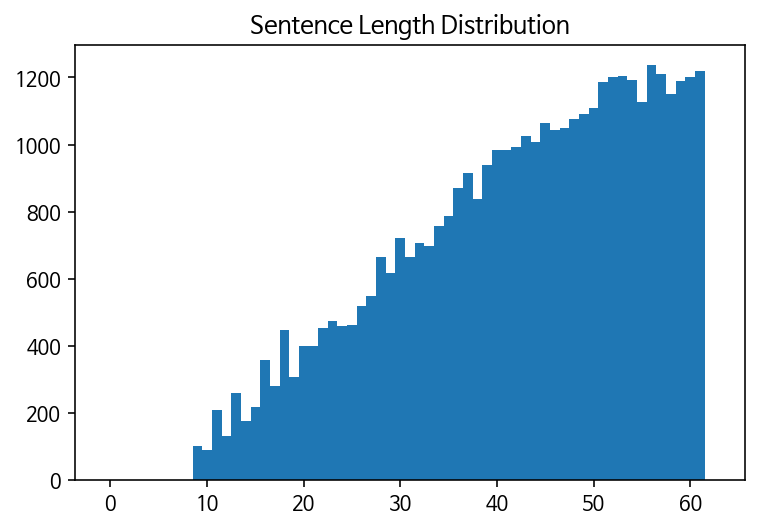

In [ ]:
max_len = 63
min_len = 10

kor_li = [s for s in kor_li if (len(s) < max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in kor_li:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [ ]:
print(len(eng_li))

41078


In [ ]:
print(len(kor_li))

40004


# 데이터 전처리 : 정제하기

In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import re
import numpy as np
import os
import io
import time

In [ ]:
def preprocess_sentence(sentence, s_token=False, e_token=False, mode = 'kor'):
  assert mode in ['kor', 'eng'], 'eng와 kor 중에 선택해주세요.'
  
  if mode == 'eng':
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.strip()

  elif mode == 'kor':
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^ㄱ-ㅎ가-힣?.!,]+", " ", sentence)
    sentence = sentence.strip()
  
  if s_token:
      sentence = '<start> ' + sentence

  if e_token:
      sentence += ' <end>'
    
  return sentence

In [ ]:
# 3만개, 1만5천개,1만 세션 다운 됐었는데(코드 수정전에), 코드 수정하고는 안해봄.

num_examples = 5000

In [ ]:
eng_corpus = []

for sentence in eng_li[:num_examples]:
  eng = sentence

  eng_corpus.append(preprocess_sentence(eng, s_token=True, e_token=True, mode='eng'))
  

print("English :", eng_corpus[100])


English : <start> he dangled his infant son and his morbidly altered face just gets weirder . <end>


In [ ]:
print(eng_corpus[0])

<start> much of personal computing is about can you top this ? <end>


In [ ]:
len(eng_corpus)

5000

In [ ]:
kor_corpus = []

for sentence in kor_li[:num_examples]:
  kor = sentence
  # mecab.morphs()가 <start>랑 <end>를 <,s,t,a,r,t,>,이런식으로 나눠서
  # s_token, e_token False로 했음.
  kor_corpus.append(preprocess_sentence(kor,mode='kor'))
  

print("Korean :", kor_corpus[100])

Korean : 그리고 그는 덧붙여 , 우리는 더욱 강력한 무기도 갖고 있소 .


In [ ]:
print(kor_corpus[0])

개인용 컴퓨터 사용의 상당 부분은 이것보다 뛰어날 수 있느냐 ?


In [ ]:
len(kor_corpus)

5000

# 데이터 전처리 : 토큰화

In [ ]:
def tokenize(corpus):
  tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  tokenizer.fit_on_texts(corpus)

  tensor = tokenizer.texts_to_sequences(corpus)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

  return tensor, tokenizer

In [ ]:
def load_dataset(corpus_i, corpus_t):
  # 전처리된 타겟 문장과 입력 문장 쌍을 생성합니다.
  targ_lang, inp_lang = corpus_t, corpus_i

  input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
  target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

  return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [ ]:
ls

drive/  Mecab-ko-for-Google-Colab/  sample_data/


In [ ]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [ ]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_210108.sh


In [ ]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 450kB 50.9MB/s 
     |████████████████████████████████| 92kB 11.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-06-20 11:22:33--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=M0%2FSuJwiN%2F2%2BtefYpiLGWT5FvQk%3D&Expires=1624189384&AWSAccessKeyId=AKIA6KO

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()

In [ ]:
# mecab 잘돌아가는지 확인

print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [ ]:
def mecab_split(sentence):

  return mecab.morphs(sentence)

mecab_corpus = [] 

# 불용어 (stopwords)
# stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

for kor in kor_corpus:
  kor_i = ''
  kor_i = mecab_split(kor)
  # kor_i = [word for word in kor_i if not word in stopwords]
  kor_i.insert(0, '<start>')
  kor_i.append('<end>')
  kor_i = " ".join(kor_i)
  mecab_corpus.append(kor_i)

In [ ]:
len(mecab_corpus)

5000

In [ ]:
mecab_corpus[:5]

['<start> 개인 용 컴퓨터 사용 의 상당 부분 은 이것 보다 뛰어날 수 있 느냐 ? <end>',
 '<start> 모든 광 마우스 와 마찬가지 로 이 광 마우스 도 책상 위 에 놓 는 마우스 패드 를 필요 로 하 지 않 는다 . <end>',
 '<start> 그러나 이것 은 또한 책상 도 필요 로 하 지 않 는다 . <end>',
 '<start> 결정 적 인 순간 에 그 들 의 능력 을 증가 시켜 줄 그 무엇 이 매우 중요 합니다 . <end>',
 '<start> 그러나 침체 되 고 있 는 미국 경제 와 국내 수요 의 약세 전망 이 향후 수개월 동안 의 낙관 론 을 어둡 게 했 다 . <end>']

In [ ]:
eng_corpus[:5]

['<start> much of personal computing is about can you top this ? <end>',
 '<start> so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable , wireless mouse . <end>',
 '<start> like all optical mice , but it also doesn t need a desk . <end>',
 '<start> uses gyroscopic sensors to control the cursor movement as you move your wrist , arm , whatever through the air . <end>',
 '<start> something that will boost their capabilities at crucial moments is very important . <end>']

In [ ]:
print(len(eng_corpus))
print()
print(len(mecab_corpus))

5000

5000


In [ ]:
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(corpus_i=mecab_corpus, corpus_t=eng_corpus)

# 타겟 텐서와 입력 텐서의 최대 길이를 계산합니다.
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

In [ ]:
print(target_tensor.shape[1])
print(target_tensor.shape)
print(target_tensor[1])

34
(5000, 34)
[   2   82    8 2522    8  125  330  180   37    8 3376  592 2523 1219
  871   10  114 3376    5  592 1219    1    3    0    0    0    0    0
    0    0    0    0    0    0]


In [ ]:
print(input_tensor.shape[1])
print(input_tensor.shape)
print(input_tensor[1])

38
(5000, 38)
[   1  130 3461 1353   36 1194   24    5 3461 1353   25 2165  360   10
  347    6 1353 5052   14  225   24   13   27   39  185    3    2    0
    0    0    0    0    0    0    0    0    0    0]


In [ ]:
print('English Vocab Size :',len(targ_lang.index_word)+1)
print('Korean Vocab Size :',len(inp_lang.index_word)+1)

English Vocab Size : 10432
Korean Vocab Size : 10146


In [ ]:
print(max_length_targ, max_length_inp)

34 38


In [ ]:
# 훈련 집합과 검증 집합을 80대 20으로 분리합니다.
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2, shuffle=False)

# 훈련 집합과 검증 집합의 데이터 크기를 출력합니다.
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

4000 4000 1000 1000


In [ ]:
print(input_tensor_train.shape, target_tensor_train.shape,input_tensor_val.shape, target_tensor_val.shape)

(4000, 38) (4000, 34) (1000, 38) (1000, 34)


In [ ]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

In [ ]:
print ("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[2])
print ()
print ("Target Language; index to word mapping")
convert(targ_lang, target_tensor_train[2])

Input Language; index to word mapping
1 ----> <start>
56 ----> 그러나
121 ----> 이것
7 ----> 은
118 ----> 또한
2165 ----> 책상
25 ----> 도
225 ----> 필요
24 ----> 로
13 ----> 하
27 ----> 지
39 ----> 않
185 ----> 는다
3 ----> .
2 ----> <end>

Target Language; index to word mapping
2 ----> <start>
95 ----> like
60 ----> all
2523 ----> optical
2034 ----> mice
5 ----> ,
21 ----> but
15 ----> it
50 ----> also
310 ----> doesn
46 ----> t
243 ----> need
8 ----> a
2524 ----> desk
1 ----> .
3 ----> <end>


# tf.data 데이터셋 생성하기

In [ ]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train))
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 38]), TensorShape([64, 34]))

# 인코더 모델과 디코더 모델 쓰기

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# 샘플 입력
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 38, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # 쿼리 은닉 상태(query hidden state)는 (batch_size, hidden size)쌍으로 이루어져 있습니다.
    # query_with_time_axis은 (batch_size, 1, hidden size)쌍으로 이루어져 있습니다.
    # values는 (batch_size, max_len, hidden size)쌍으로 이루어져 있습니다.
    # 스코어(score)계산을 위해 덧셈을 수행하고자 시간 축을 확장하여 아래의 과정을 수행합니다.
    query_with_time_axis = tf.expand_dims(query, 1)

    # score는 (batch_size, max_length, 1)쌍으로 이루어져 있습니다.
    # score를 self.V에 적용하기 때문에 마지막 축에 1을 얻습니다.
    # self.V에 적용하기 전에 텐서는 (batch_size, max_length, units)쌍으로 이루어져 있습니다.
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights는 (batch_size, max_length, 1)쌍으로 이루어져 있습니다. 
    attention_weights = tf.nn.softmax(score, axis=1)

    # 덧셈이후 컨텍스트 벡터(context_vector)는 (batch_size, hidden_size)쌍으로 이루어져 있습니다.
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 38, 1)


In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # 어텐션을 사용합니다.
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output는 (batch_size, max_length, hidden_size)쌍으로 이루어져 있습니다.
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # 임베딩층을 통과한 후 x는 (batch_size, 1, embedding_dim)쌍으로 이루어져 있습니다.
    x = self.embedding(x)

    # 컨텍스트 벡터와 임베딩 결과를 결합한 이후 x의 형태는 (batch_size, 1, embedding_dim + hidden_size)쌍으로 이루어져 있습니다.
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # 위에서 결합된 벡터를 GRU에 전달합니다.
    output, state = self.gru(x)

    # output은 (batch_size * 1, hidden_size)쌍으로 이루어져 있습니다.
    output = tf.reshape(output, (-1, output.shape[2]))

    # output은 (batch_size, vocab)쌍으로 이루어져 있습니다.
    x = self.fc(output)

    return x, state, attention_weights

In [ ]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 10432)


# 최적화 함수와 손실 함수 정의하기

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

# 체크포인트 (객체 기반 저장)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

# 언어 모델 훈련하기

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

    # 교사 강요(teacher forcing) - 다음 입력으로 타겟을 피딩(feeding)합니다.
    for t in range(1, targ.shape[1]):
      # enc_output를 디코더에 전달합니다.
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # 교사 강요(teacher forcing)를 사용합니다.
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
EPOCHS = 10

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # # 에포크가 2번 실행될때마다 모델 저장 (체크포인트)
  # if (epoch + 1) % 2 == 0:
  #   checkpoint.save(file_prefix = checkpoint_prefix)

  # print('Epoch {} Loss {:.4f}'.format(epoch + 1,
  #                                     total_loss / steps_per_epoch))
  # print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.1567
Epoch 2 Batch 0 Loss 0.1354
Epoch 3 Batch 0 Loss 0.1165
Epoch 4 Batch 0 Loss 0.1062
Epoch 5 Batch 0 Loss 0.0959
Epoch 6 Batch 0 Loss 0.0765
Epoch 7 Batch 0 Loss 0.0623
Epoch 8 Batch 0 Loss 0.0541
Epoch 9 Batch 0 Loss 0.0476
Epoch 10 Batch 0 Loss 0.0414


# 훈련된 모델로 번역하기

In [ ]:
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = preprocess_sentence(sentence)
  sentence = mecab_split(sentence)
  sentence.insert(0, '<start>')
  sentence.append('<end>')
  sentence = " ".join(sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # 나중에 어텐션 가중치를 시각화하기 위해 어텐션 가중치를 저장합니다.
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()
    # print(predictions[0])
    predicted_id = tf.argmax(predictions[0]).numpy()
    # print(predicted_id)
    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # 예측된 ID를 모델에 다시 피드합니다.
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [ ]:
# 어텐션 가중치를 그리기 위한 함수입니다.
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [ ]:
def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

# 마지막 체크포인트(checkpoint)를 복원

In [ ]:
# # checkpoint_dir내에 있는 최근 체크포인트(checkpoint)를 복원합니다.
# checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

#  테스트하기

- English Vocab Size : 10432
- Korean Vocab Size : 10146

Input: <start> 개인 용 컴퓨터 사용 의 상당 부분 은 이것 보다 뛰어날 수 있 느냐 ? <end>
Predicted translation: much of personal computing is about can you top this ? <end> 


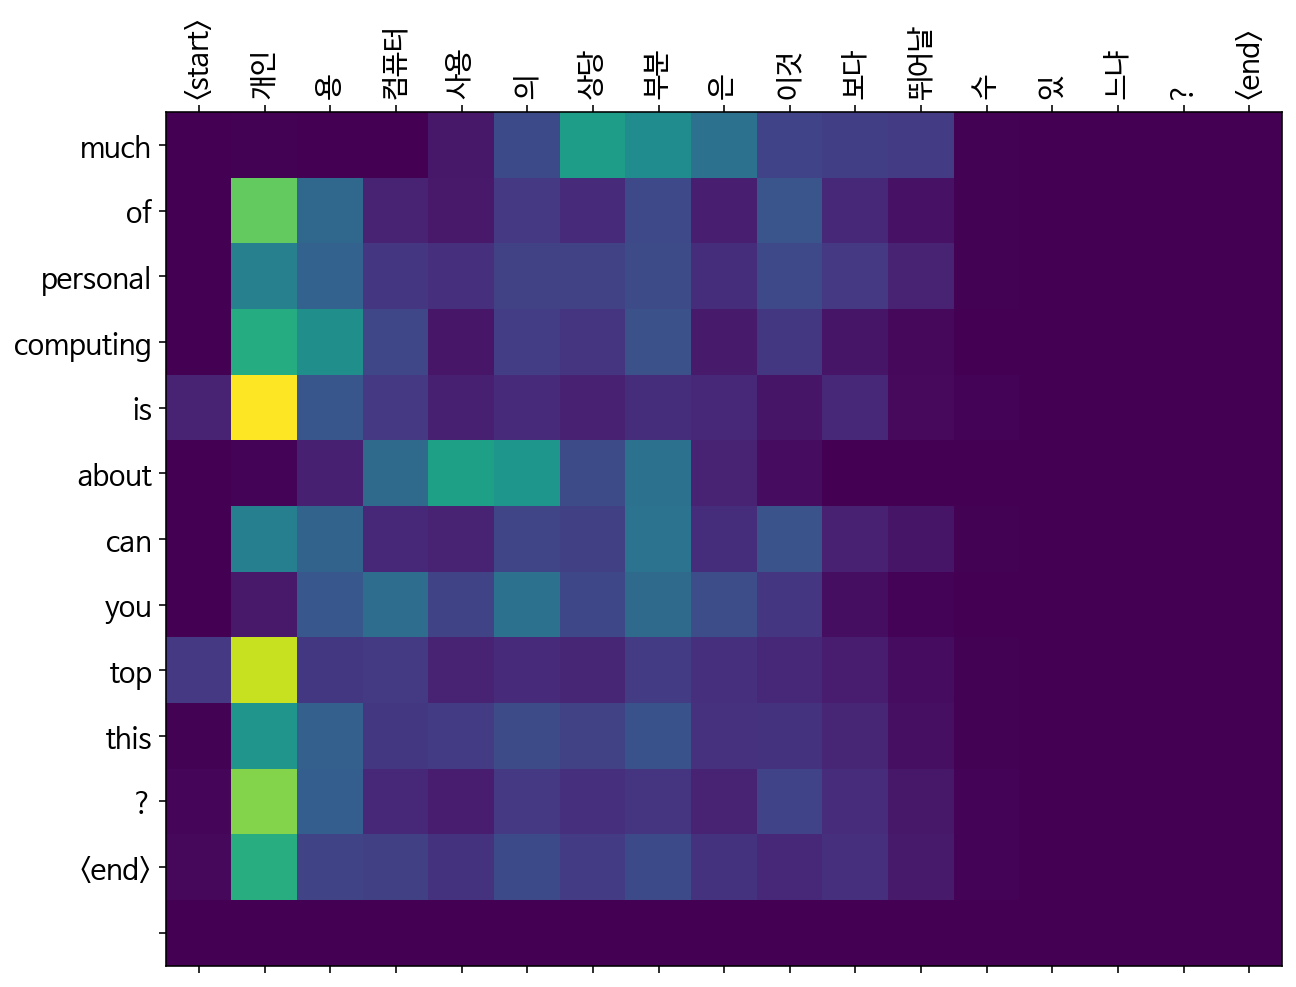

In [ ]:
# epochs 많이 돌림. Loss 0.0414까지

translate('개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"')

Input: <start> 그러나 이것 은 또한 책상 도 필요 로 하 지 않 는다 . <end>
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 


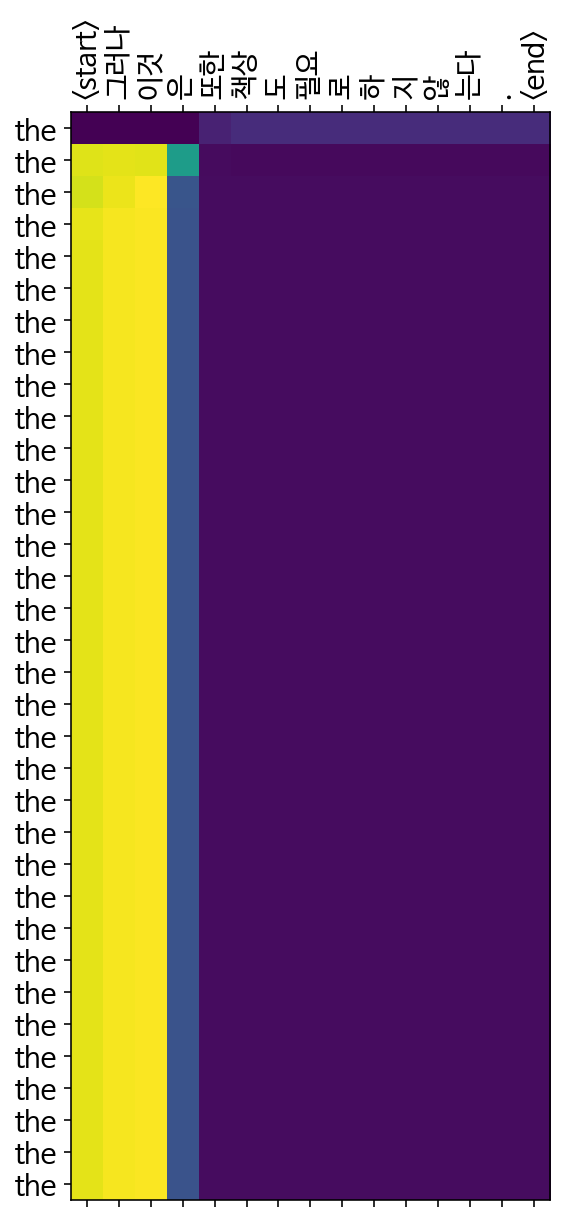

In [ ]:
# epochs 3

translate('그러나 이것은 또한 책상도 필요로 하지 않는다.')

Input: <start> 그러나 이것 은 또한 책상 도 필요 로 하 지 않 는다 . <end>
Predicted translation: like all optical mice , but it also doesn t need a desk . <end> 


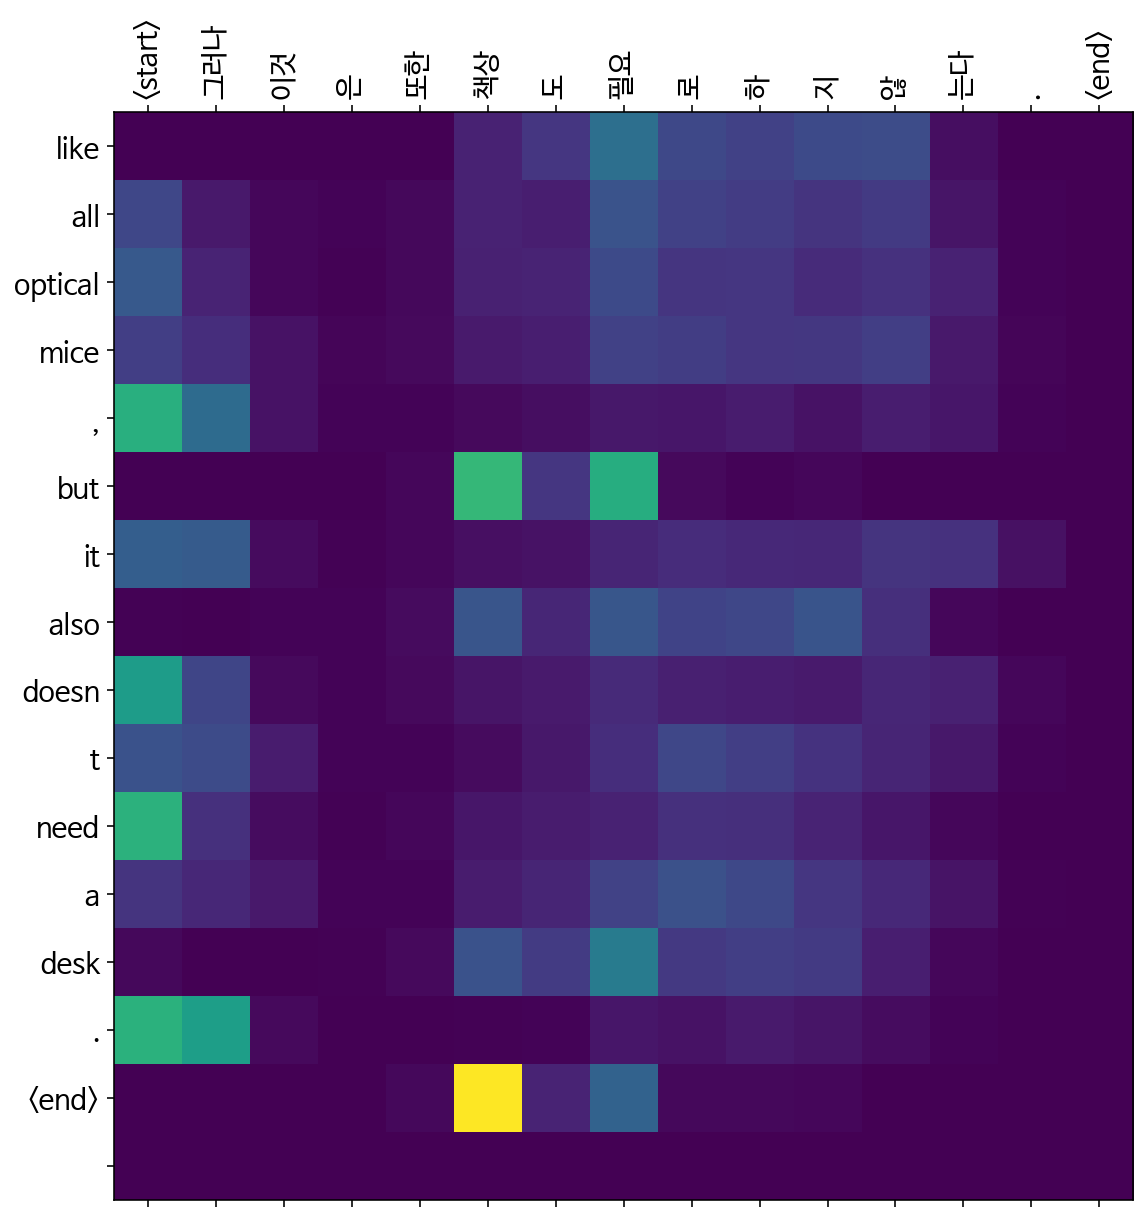

In [ ]:
translate('그러나 이것은 또한 책상도 필요로 하지 않는다.')

Input: <start> 모든 광 마우스 와 마찬가지 로 이 광 마우스 도 책상 위 에 놓 는 마우스 패드 를 필요 로 하 지 않 는다 . <end>
Predicted translation: . <end> 


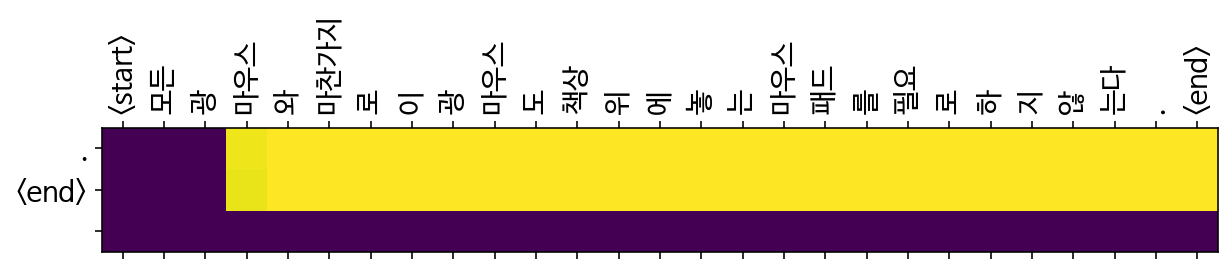

In [ ]:
# epochs 1

translate('모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.')

Input: <start> 모든 광 마우스 와 마찬가지 로 이 광 마우스 도 책상 위 에 놓 는 마우스 패드 를 필요 로 하 지 않 는다 . <end>
Predicted translation: so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable , wireless mouse . <end> 


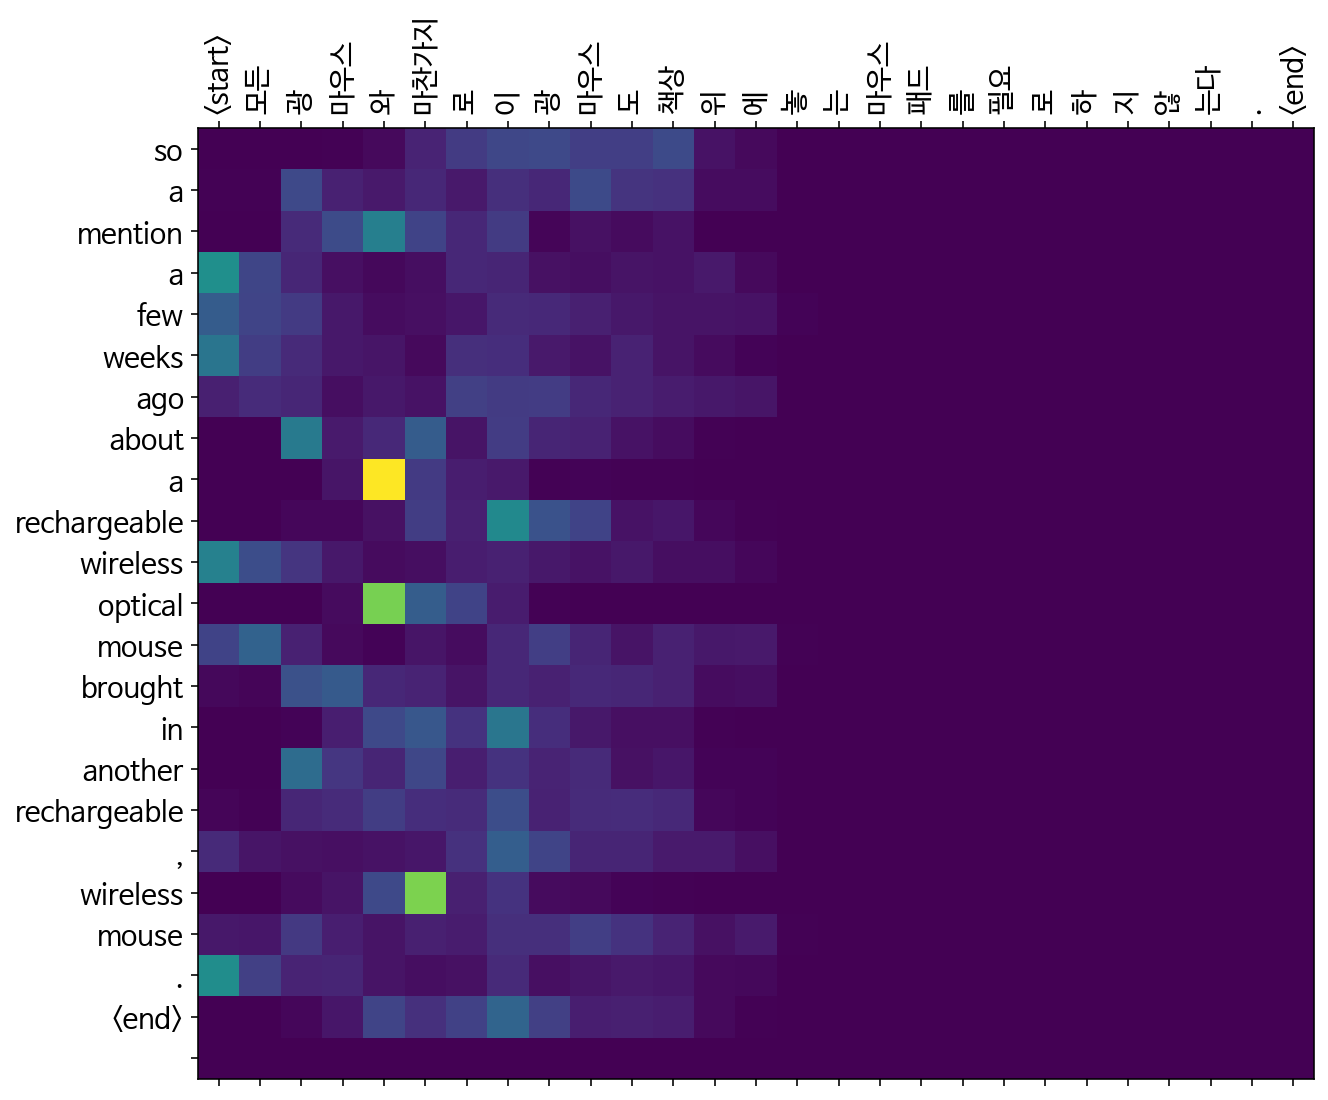

In [ ]:
translate('모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.')

```
['개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"',
 '모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.',
 '그러나 이것은 또한 책상도 필요로 하지 않는다.']
```